In [1]:
'''
Import Necessary Packages and Libraries
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
from pandas_profiling import ProfileReport
from csv import reader,DictReader

In [2]:
'''
1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy
'''
pass

In [3]:
'''
1. Business Understanding

Below are some business questions
1.) What are the most desired Platforms next year (2020)?
2.) What are the most desired Databases next year (2020)?
3.) What are the most desired Programming Languages next year (2020)?
4.) What are the most desired Web Frameworks next year (2020)?
5.) What are the most desired Dev environments?
'''
pass

In [4]:
'''
Defining constants
'''
data_file='../data/survey_results_public_2019.csv'
data_profile_report='../reports/data_profile_survey_results_public_2019.csv.html'

In [5]:
'''
Read csv and create dataframe
'''
df_2019=pd.read_csv(data_file,\
               delimiter=',',\
               header=0,\
               encoding ='utf-8'\
              )

In [6]:
'''
Profile Data
'''
#profile = ProfileReport(df)
#profile.to_file(output_file=data_profile_report)
pass

In [7]:
def get_df_desired_x(df,cs,cd):
    """ Get a data
    Args:
    df - data_frame. Data to be searched for the s/w component
    cs - float. Name of the field in the data frame to be searched
    cd - float. Name of the desired s/w component in output
    
    Logic:
    Parses a ';' delimited text and gets the frequency of each word
    
    Returns:
    Dataframe with most frequent occurences of a word (In this case s/w)
    """

    #Split string and conver to a series
    df['split_cs']=df[cs].str.split(";")
    df1=df['split_cs'].apply(pd.Series).stack().reset_index(drop=True)

    #Convert Series to Data frame and add a column for counting later
    df2=df1.to_frame()
    df2.columns = [cd]
    df2['cntr']=1


    #Get the count of each work and order by descending occurence
    df3=df2.groupby(cd).sum()['cntr'].to_frame()
    df3.columns = ['Counts']
    df3 = df3.sort_values('Counts',ascending=False)

    
    
    return df3

In [8]:
'''
1.) What are the most desired Platforms next year (2020)?
Data
'''
df_desired_platforms=get_df_desired_x(df_2019,'PlatformDesireNextYear','PlatformsDesired')
df_desired_platforms

,Counts
PlatformsDesired,
Linux,42178
Docker,32963
Windows,28215
AWS,26298
Android,24749
Kubernetes,17793
Raspberry Pi,17768
MacOS,17433
Google Cloud Platform,15916


<Figure size 576x396 with 0 Axes>

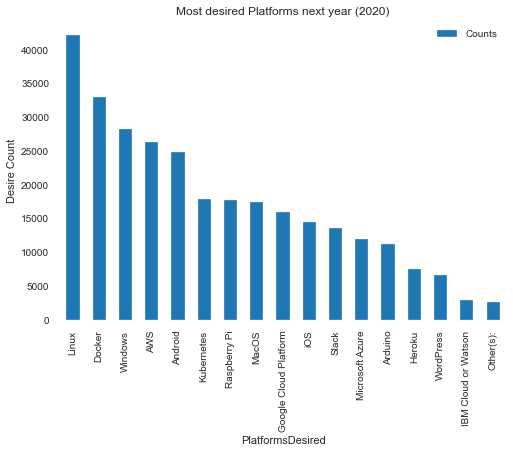

In [9]:
'''
1.) What are the most desired Platforms next year (2020)?
Plot
'''
plt.figure()
df_desired_platforms.plot(kind='bar')
plt.title('Most desired Platforms next year (2020)')
plt.ylabel('Desire Count')
plt.show()

In [10]:
'''
2.) What are the most desired Databases next year (2020)?
Data
'''
df_desired_databases=get_df_desired_x(df_2019,'DatabaseDesireNextYear','DatabaseDesired')
df_desired_databases

,Counts
DatabaseDesired,
PostgreSQL,26446
MySQL,25750
MongoDB,23667
Redis,17913
SQLite,17807
Microsoft SQL Server,16225
Elasticsearch,15440
Firebase,11921
MariaDB,9986


In [ ]:
'''
2.) What are the most desired Databases next year (2020)?
'''
plt.figure()
df_desired_databases.plot(kind='bar')
plt.figure(figsize=(576,396))
plt.title('Most desired Databases next year (2020)')
plt.ylabel('Desire Count')
plt.show()

<Figure size 576x396 with 0 Axes>